<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/DSHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

#1.

In [ ]:
df = pd.read_csv('lending_club_data.csv')

In [ ]:
data = df[(df.home_ownership =='RENT') | (df.home_ownership == 'OWN') | (df.home_ownership == 'MORTGAGE')].copy()

In [ ]:
f = 'default ~ funded_amnt + home_ownership + annual_inc + int_rate'
logitfit = smf.logit(formula = str(f), data = data).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.370605
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:               335382
Model:                          Logit   Df Residuals:                   335376
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Feb 2023   Pseudo R-squ.:                 0.04355
Time:                        02:54:33   Log-Likelihood:            -1.2429e+05
converged:                       True   LL-Null:                   -1.2995e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.4253      0.024   -142.467      0.000      -3.472      -3.378
home_ownership[T.OWN]      0.1069      0.019      5.665      0.000       0.070       0.144
home_ownership[T.RENT]     0.2000      0.011     17.471      0.000       0.178       0.222
funded_amnt             1.236e-05   7.98e-07     15.494      0.000    1.08e-05    1.39e-05
annual_inc             -5.098e-06   1.71e-07    -29.781      0.000   -5.43e-06   -4.76e-06
int_rate                   0.1210      0.001     90.552      0.000       0.118       0.124
==========================================================================================
"""

In [ ]:
print(np.exp(0.2000))

1.2214027581601699


The odd ratio of default for those who rent vs those who hold a mortgage is 1.22. This means that the default for renting is approximately 22% more likey to occur than default with a mortgage.

In [ ]:
predict = data['predict'] = logitfit.predict(data)

Text(0, 0.5, 'Predicted Frequency')

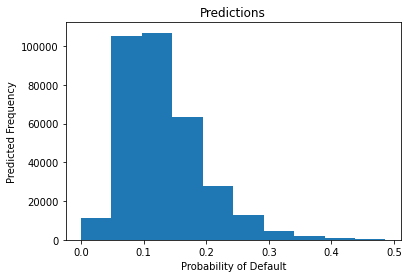

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['predict'])
plt.title('Predictions')
plt.xlabel('Probability of Default')
plt.ylabel('Predicted Frequency')

This graph shows that the predictions lie most frequently between 0.05 and 0.2. This means that  most of the people in the dataset have a probability of default between 0.05 and 0.2.


In [ ]:
round_pred = data['predict'].astype(float)
new_pred = round_pred*10
ceil_pred = np.ceil(new_pred)
div_pred = ceil_pred/10
rounded_column = data['rounded'] = div_pred
print(rounded_column)

0         0.1
1         0.1
2         0.2
3         0.1
4         0.1
         ... 
335553    0.1
335554    0.2
335555    0.1
335556    0.1
335557    0.2
Name: predict, Length: 335382, dtype: float64


In [ ]:
data.groupby('rounded')['default'].mean()

rounded
0.1    0.067064
0.2    0.148080
0.3    0.231805
0.4    0.281404
0.5    0.356532
Name: default, dtype: float64

Yes, the default risk increases across the groups meaning that for each increasing group of loan risk, the average risk of default also increases.

0.8014532682135594


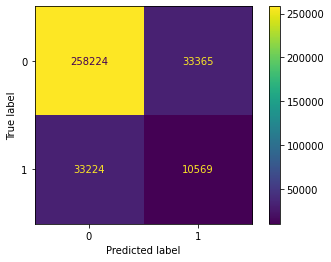

In [ ]:
# check accuracy and confusion matrix
import sklearn.metrics
import matplotlib.pyplot as plt

# predict default when thres > 0.2
data['thresh']=np.where(data['predict'] > .2, 1.0, 0.0)

# accuracy and confusion matrix
print(sklearn.metrics.accuracy_score(data['default'], data['thresh']))
cm=sklearn.metrics.confusion_matrix(data['default'], data['thresh'])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

With the threshold for granting a loan of 0.2, the following matrix can be created. The classificiation accuracy of the model is approximately 80%. This is relatively high and is a good representation of the data. Additionally, this matrix provides us with information of the amount of loans denied that would have been paid back (false positives), as well as false negatives, true positives, and true negatives. The right column represents loans that were denied (top being ones that would have been paid back, bottom representing those that wouldn't have been paid). The amount of cases that fall into the false positive category are 33365, resulting in an approximate 11% of loans that were denied that would have been paid back. The calculations are as follows:


*   33365/(258224+33365)
*   33365/291,589
*   11.4%


This rate represents the amount of loans that were denied to individuals that would have been paid back had they been granted one.